## Assignment

In this assignment, you'll continue working with the [U.S. Education Dataset](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home) from Kaggle. The data gives detailed state level information on several facets of education on an annual basis. To learn more about the data and the column descriptions, you can view the Kaggle link above. 

Access this data using the Thinkful database using these credentials:

postgres_user = 'dsbc_student'<br>
postgres_pw = '7\*.8G9QH21'<br>
postgres_host = '142.93.121.174'<br>
postgres_port = '5432'<br>
postgres_db = 'useducation'<br>

Don't forget to apply the most suitable missing value filling techniques from the previous checkpoint to the data. Provide the answers to the following only *after* you've addressed missing values!

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Consider the two variables: *TOTAL_REVENUE* and *TOTAL_EXPENDITURE*. Do these variables have outlier values?
2. If you detect outliers in the *TOTAL_REVENUE* and *TOTAL_EXPENDITURE* variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.
3. Create another variable by subtracting the original *TOTAL_EXPENDITURE* from *TOTAL_REVENUE* (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.
4. Now create another variable by subtracting the *TOTAL_EXPENDITURE* from *TOTAL_REVENUE*. This time, use the outlier eliminated versions of *TOTAL_EXPENDITURE* from *TOTAL_REVENUE*. In this newly created variable, can you find any outliers? If so, eliminate them.
5. Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?
6. If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?

Submit your work below, and plan on discussing with your mentor. You can also take a look at this [example solution](https://github.com/Thinkful-Ed/data-201-assignment-solutions/blob/master/model_prep_outliers/solution.ipynb).

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [9]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [36]:
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]

states = education_df["STATE"].unique()

for state in states:
    education_df.loc[education_df["STATE"] == state, fill_list] = education_df.loc[education_df["STATE"] == state, fill_list].interpolate()

# we drop the null values after interpolation
education_df.dropna(inplace=True)

## HW1. Consider the two variables: *TOTAL_REVENUE* and *TOTAL_EXPENDITURE*. Do these variables have outlier values?

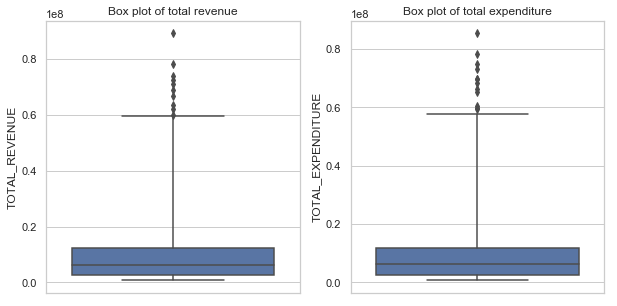

In [45]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.boxplot(education_df["TOTAL_REVENUE"], whis = 5, orient = 'v')
plt.title("Box plot of total revenue")
plt.subplot(1,2,2)
sns.boxplot(education_df["TOTAL_EXPENDITURE"], whis = 5,orient = 'v')
plt.title("Box plot of total expenditure")
plt.show()

## HW2. If you detect outliers in the *TOTAL_REVENUE* and *TOTAL_EXPENDITURE* variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

### 1. drop the outliers

### 2. Limiting the values of the outliers (winsorization)

In [46]:
from scipy.stats.mstats import winsorize
winsorized_revenue = winsorize(education_df["TOTAL_REVENUE"], (0, 0.05))
winsorized_expenditure = winsorize(education_df["TOTAL_EXPENDITURE"], (0, 0.05))

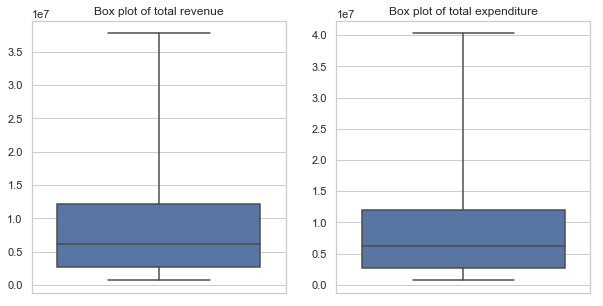

In [47]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.boxplot(winsorized_revenue, whis = 5, orient = 'v')
plt.title("Box plot of total revenue")
plt.subplot(1,2,2)
sns.boxplot(winsorized_expenditure, whis = 5,orient = 'v')
plt.title("Box plot of total expenditure")
plt.show()

### 3. Trasformation

##  HW3. Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.¶


In [55]:
budget_def = education_df["TOTAL_REVENUE"] - education_df["TOTAL_EXPENDITURE"]

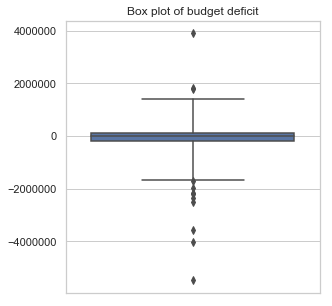

In [56]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.boxplot(budget_def, whis = 5, orient = 'v')
plt.title("Box plot of budget deficit")
plt.show()

In [62]:
winsorized_budget = winsorize(budget_def, (0.05, 0.05))

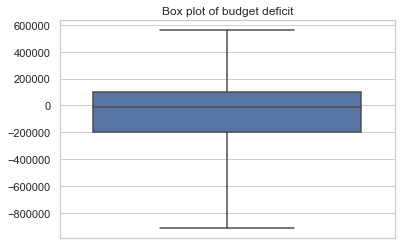

In [63]:
sns.boxplot(winsorized_budget, whis = 5, orient = 'v')
plt.title("Box plot of budget deficit")
plt.show()

## HW4. Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. But this time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.¶


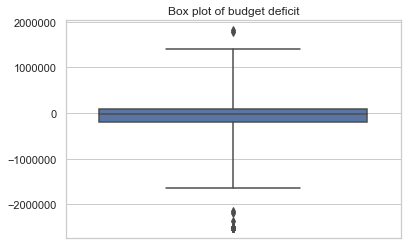

In [64]:
budget_def2 = winsorized_revenue - winsorized_expenditure
sns.boxplot(budget_def2, whis = 5, orient = 'v')
plt.title("Box plot of budget deficit")
plt.show()

In [66]:
winsorized_budget2 = winsorize(budget_def2, (0.05, 0.05))

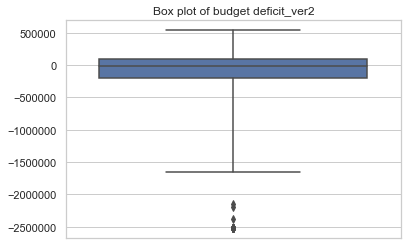

In [67]:
sns.boxplot(winsorized_budget2, whis = 5, orient = 'v')
plt.title("Box plot of budget deficit_ver2")
plt.show()

## HW5. Compare some basic statistics of the budget variables you end up with in the third and the fourth questions. Do you see any differences?¶


In [68]:
pd.DataFrame({"original_budget": budget_def, "winsorized_budget1": winsorized_budget,
              "winsorized_budget2": winsorized_budget2}).describe()

,original_budget,winsorized_budget1,winsorized_budget2
count,4.660000e+02,466.000000,4.660000e+02
mean,-8.094882e+04,-58733.012876,-1.720532e+05
std,6.144222e+05,341300.816505,6.509561e+05
min,-5.487742e+06,-913765.000000,-2.518429e+06
25%,-1.965748e+05,-196574.750000,-2.047750e+05
50%,-8.872500e+03,-8872.500000,-1.282350e+04
75%,1.013948e+05,101394.750000,9.826300e+04
max,3.897129e+06,560511.000000,5.400550e+05


## HW6. If our variable of interest is the budget deficit variable, which method do you think is the most appropriate one in dealing with the outliers in this variable. The method in the third question or the one in the fourth question?

Third method is better.